In [ ]:
# The same object can look different under varying lighting (e.g., sunlight vs. indoor bulb).

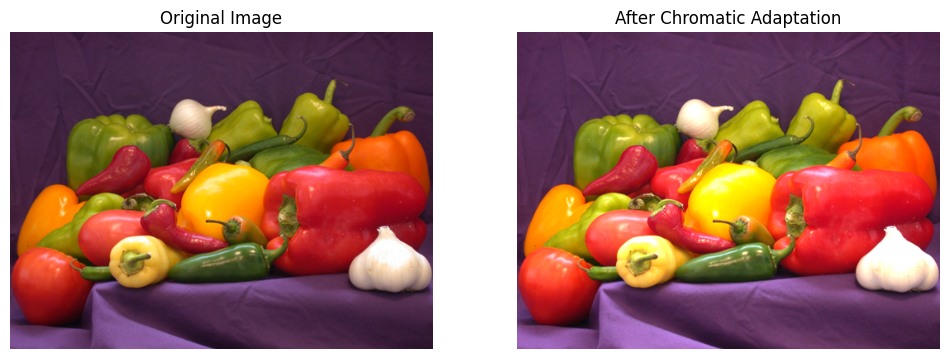

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def chromatic_adaptation(img, source_white, target_white):

    result = img.copy().astype(np.float32)

    # Compute scaling factors
    scale_r = target_white[0] / source_white[0]
    scale_g = target_white[1] / source_white[1]
    scale_b = target_white[2] / source_white[2]

    # Apply the scaling
    result[:, :, 0] = result[:, :, 0] * scale_b
    result[:, :, 1] = result[:, :, 1] * scale_g
    result[:, :, 2] = result[:, :, 2] * scale_r

    # Clip values to be in valid range
    result = np.clip(result, 0, 255).astype(np.uint8)

    return result


image = cv2.imread('/content/peppers.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Example white points (could be estimated or predefined)
source_white = [200, 200, 200]  # Under warm light
target_white = [255, 255, 255]  # Standard daylight

# Apply chromatic adaptation
adapted_image = chromatic_adaptation(image, source_white, target_white)

# Show the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(adapted_image)
plt.title('After Chromatic Adaptation')
plt.axis('off')

plt.show()
